In [ ]:
!pip install kaggle kagglehub


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import kagglehub

# Descargar el conjunto de datos
path = kagglehub.dataset_download("francescopettini/license-plate-characters-detection-ocr")
path2 = '/content/drive/MyDrive/ColabArchivos/placa_recortada4.jpg'
print("Path to dataset files:", path)




100%|██████████| 12.4M/12.4M [00:00<00:00, 20.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/francescopettini/license-plate-characters-detection-ocr/versions/2


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
# Ruta de la imagen
image_file = os.path.join(path, "LP-characters/images/0094.png")

# Leer y mostrar la imagen
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Imagen 0094.png")
plt.axis("off")
plt.show()


NameError: name 'path' is not defined

In [ ]:
import xml.etree.ElementTree as ET

# Seleccionar un archivo de anotación para inspeccionar
annotation_file = os.path.join(path, "LP-characters/annotations/0094.xml")  # Cambia si encuentras el correspondiente

# Leer el archivo de anotación
tree = ET.parse(annotation_file)
root = tree.getroot()

# Mostrar el contenido del archivo de anotación
print("Contenido del archivo de anotación:")
for obj in root.findall("object"):
    name = obj.find("name").text
    bndbox = obj.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)
    print(f"Etiqueta: {name}, Caja: ({xmin}, {ymin}, {xmax}, {ymax})")


Contenido del archivo de anotación:
Etiqueta: D, Caja: (13, 16, 25, 38)
Etiqueta: L, Caja: (25, 15, 38, 38)
Etiqueta: 3, Caja: (40, 16, 52, 37)
Etiqueta: C, Caja: (53, 15, 66, 37)
Etiqueta: A, Caja: (67, 15, 80, 37)
Etiqueta: Y, Caja: (81, 15, 92, 37)
Etiqueta: 2, Caja: (94, 16, 107, 37)
Etiqueta: 2, Caja: (108, 15, 121, 38)
Etiqueta: 3, Caja: (121, 15, 135, 37)
Etiqueta: 1, Caja: (137, 15, 146, 37)


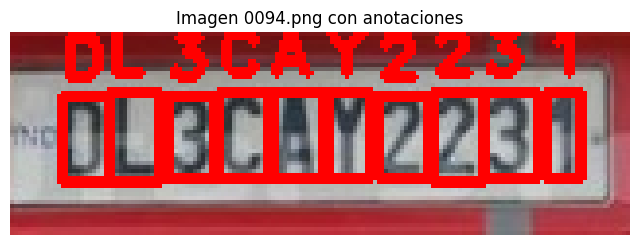

In [ ]:
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Rutas de la imagen y el archivo de anotación
image_file = os.path.join(path, "LP-characters/images/0094.png")
annotation_file = os.path.join(path, "LP-characters/annotations/0094.xml")

# Leer la imagen
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para Matplotlib

# Leer el archivo de anotación
tree = ET.parse(annotation_file)
root = tree.getroot()

# Dibujar las cajas delimitadoras en la imagen
for obj in root.findall("object"):
    name = obj.find("name").text  # Etiqueta del objeto (carácter)
    bndbox = obj.find("bndbox")  # Caja delimitadora
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)

    # Dibujar la caja y el texto en la imagen
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # Caja en azul
    cv2.putText(image, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Texto en azul

# Mostrar la imagen con las etiquetas
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Imagen 0094.png con anotaciones")
plt.axis("off")
plt.show()


In [ ]:
import os

# Ruta en Google Drive
base_drive_path = '/content/drive/MyDrive/ColabArchivos/OCR_entrenamiento'

# Crear la carpeta si no existe
os.makedirs(base_drive_path, exist_ok=True)
print("Carpeta creada o ya existente en:", base_drive_path)


Carpeta creada o ya existente en: /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento


In [ ]:
import os
import xml.etree.ElementTree as ET
import shutil

# Ruta base del dataset
dataset_path = path
images_path = os.path.join(dataset_path, "LP-characters/images")
annotations_path = os.path.join(dataset_path, "LP-characters/annotations")
output_path = os.path.join(base_drive_path, "YOLO")

# Crear carpetas de salida
os.makedirs(output_path, exist_ok=True)
os.makedirs(os.path.join(output_path, "images"), exist_ok=True)
os.makedirs(os.path.join(output_path, "labels"), exist_ok=True)

# Convertir las anotaciones
for annotation_file in os.listdir(annotations_path):
    if annotation_file.endswith(".xml"):
        tree = ET.parse(os.path.join(annotations_path, annotation_file))
        root = tree.getroot()

        # Leer dimensiones de la imagen
        size = root.find("size")
        width = int(size.find("width").text)
        height = int(size.find("height").text)

        # Crear archivo de salida
        label_file = os.path.join(output_path, "labels", annotation_file.replace(".xml", ".txt"))
        with open(label_file, "w") as f:
            for obj in root.findall("object"):
                name = obj.find("name").text  # Etiqueta (carácter)
                bndbox = obj.find("bndbox")
                xmin = int(bndbox.find("xmin").text)
                ymin = int(bndbox.find("ymin").text)
                xmax = int(bndbox.find("xmax").text)
                ymax = int(bndbox.find("ymax").text)

                # Convertir a formato YOLO
                x_center = ((xmin + xmax) / 2) / width
                y_center = ((ymin + ymax) / 2) / height
                bbox_width = (xmax - xmin) / width
                bbox_height = (ymax - ymin) / height

                # Escribir en formato YOLO (clase x_center y_center width height)
                f.write(f"0 {x_center} {y_center} {bbox_width} {bbox_height}\n")

        # Copiar la imagen correspondiente
        image_file = os.path.join(images_path, annotation_file.replace(".xml", ".png"))
        if os.path.exists(image_file):
            shutil.copy(image_file, os.path.join(output_path, "images", annotation_file.replace(".xml", ".png")))


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 8.60 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 44.9 MB/s eta 0:00:00


In [ ]:
# Ruta del archivo data.yaml en Google Drive
yaml_path = '/content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/data.yaml'

# Contenido del archivo YAML
yaml_content = """
train: /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/YOLO/images
val: /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/YOLO/images

nc: 1  # Número de clases
names: ['character']  # Nombre de la clase
"""

# Crear y guardar el archivo
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"Archivo data.yaml guardado en: {yaml_path}")


Archivo data.yaml guardado en: /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/data.yaml


In [ ]:
!python train.py --img 640 --batch 16 --epochs 30 --data /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/data.yaml --weights yolov5s.pt --project /content/drive/MyDrive/ColabArchivos/OCR_entrenamiento


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-03 06:06:52.029351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 06:06:52.048464: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 06:06:52.054746: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [ ]:
from IPython.display import Image, display
import torch

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-16 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


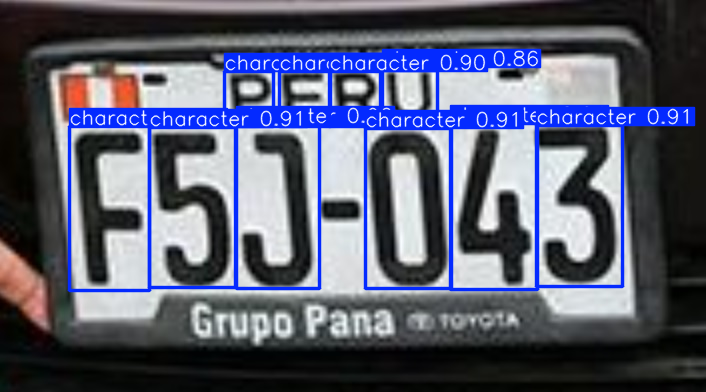

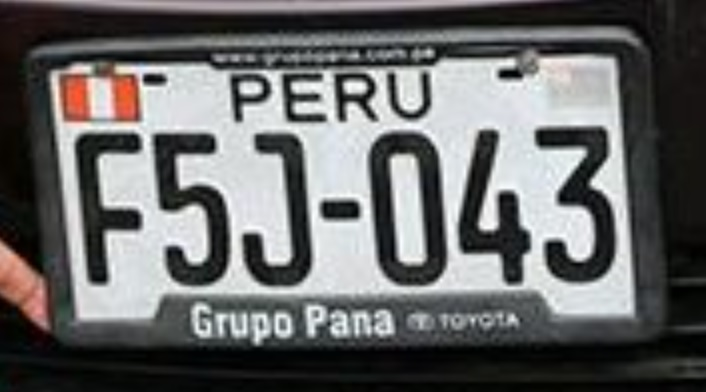

In [ ]:
# Cargar el modelo entrenado
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/ColabArchivos/OCR_entrenamiento/exp/weights/best.pt')

# Ruta de la imagen
img_path = '/content/drive/MyDrive/ColabArchivos/placa_recortada1.jpg'

# Realizar la predicción
results = model(img_path)

# Mostrar resultados
results.show()

# Mostrar la imagen con detecciones
display(Image(filename=img_path))
